# Imports

In [1]:
import pandas as pd
import numpy as np
import random
import keras
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import to_categorical

Using TensorFlow backend.


# Reading the Data and getting the shape

In [2]:
data = pd.read_csv('data/CNAE-9.data',header= None)
row, column = data.shape

# Getting the Y and X data

In [3]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1)) 
# as the classes being from 1-9 so to map it to 0-8 for one hot encoding
input_data = np.array(data.drop(0, axis=1))

# Defining variables 

In [4]:
epochs = 12 # Hyperparameters
num_classes = len(pd.unique(output_data))
batch_size = 12  # Hyperparameters
test_accuracy = []
train_accuracy = []

# One Hot coding for Y Data

In [5]:
output_data = to_categorical(output_data, num_classes)

# Splitting the train/test data (85-15) & Getting X_train/Y_train and X_test/Y_test

In [6]:
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

# Model with 1 Hidden Layer

In [7]:
model1 = Sequential()
model1.add(Dense(512, activation='relu',input_shape = (856,)))
model1.add(Dense(num_classes,activation='softmax'))

# Compiling the model and getting it's summary

In [8]:
model1.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               438784    
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 4617      
Total params: 443,401
Trainable params: 443,401
Non-trainable params: 0
_________________________________________________________________


# Fitting the model to get accuracy

In [9]:
model_fit = model1.fit(x_train, y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
1s - loss: 1.4120 - acc: 0.7990 - val_loss: 0.7943 - val_acc: 0.9022
Epoch 2/12
0s - loss: 0.4278 - acc: 0.9576 - val_loss: 0.3658 - val_acc: 0.9022
Epoch 3/12
0s - loss: 0.1718 - acc: 0.9722 - val_loss: 0.2507 - val_acc: 0.9348
Epoch 4/12
0s - loss: 0.0871 - acc: 0.9855 - val_loss: 0.2219 - val_acc: 0.9239
Epoch 5/12
0s - loss: 0.0498 - acc: 0.9939 - val_loss: 0.1989 - val_acc: 0.9348
Epoch 6/12
0s - loss: 0.0319 - acc: 0.9952 - val_loss: 0.2145 - val_acc: 0.9348
Epoch 7/12
0s - loss: 0.0202 - acc: 0.9964 - val_loss: 0.2139 - val_acc: 0.9457
Epoch 8/12
0s - loss: 0.0137 - acc: 0.9976 - val_loss: 0.2186 - val_acc: 0.9348
Epoch 9/12
0s - loss: 0.0108 - acc: 0.9976 - val_loss: 0.2047 - val_acc: 0.9457
Epoch 10/12
0s - loss: 0.0081 - acc: 0.9964 - val_loss: 0.2304 - val_acc: 0.9457
Epoch 11/12
0s - loss: 0.0052 - acc: 0.9988 - val_loss: 0.2731 - val_acc: 0.9348
Epoch 12/12
0s - loss: 0.0050 - acc: 0.9988 - val_loss: 0.2839 - val_acc:

# Predicting and getting the crosstab dataframe to check fails

In [10]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model1.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,18,0,0,0,0,0,0,0,0
2,0,18,0,0,0,0,0,0,0
3,0,0,17,0,0,0,1,0,0
4,0,0,1,18,0,0,0,0,1
5,0,0,0,0,18,0,0,0,0
6,0,0,0,0,0,18,0,0,2
7,0,0,0,0,0,0,17,0,0
8,0,0,0,0,0,0,0,18,0
9,0,0,0,0,0,0,0,0,15


# Getting Test Accuracy

In [11]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

# Plot for each epoch train and validation accuracy

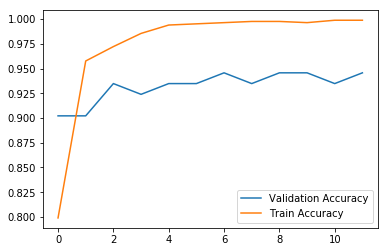

In [12]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 2 Hidden Layers

In [13]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [14]:
model2 = Sequential()
model2.add(Dense(400, activation='sigmoid',input_shape = (856,)))
model2.add(Dense(300,activation='sigmoid'))
model2.add(Dense(num_classes,activation='softmax'))

In [15]:
model2.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               342800    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 2709      
Total params: 465,809
Trainable params: 465,809
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_fit = model2.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
0s - loss: 2.2363 - acc: 0.1429 - val_loss: 2.1239 - val_acc: 0.1087
Epoch 2/12
0s - loss: 1.9109 - acc: 0.3208 - val_loss: 1.7306 - val_acc: 0.2609
Epoch 3/12
0s - loss: 1.3643 - acc: 0.6501 - val_loss: 1.2239 - val_acc: 0.5978
Epoch 4/12
0s - loss: 0.8897 - acc: 0.7821 - val_loss: 0.7501 - val_acc: 0.8478
Epoch 5/12
0s - loss: 0.5775 - acc: 0.8777 - val_loss: 0.5957 - val_acc: 0.7717
Epoch 6/12
0s - loss: 0.3858 - acc: 0.9189 - val_loss: 0.3970 - val_acc: 0.9130
Epoch 7/12
0s - loss: 0.2662 - acc: 0.9358 - val_loss: 0.3702 - val_acc: 0.8913
Epoch 8/12
0s - loss: 0.2064 - acc: 0.9407 - val_loss: 0.3483 - val_acc: 0.8913
Epoch 9/12
0s - loss: 0.1626 - acc: 0.9576 - val_loss: 0.2889 - val_acc: 0.9130
Epoch 10/12
0s - loss: 0.1240 - acc: 0.9697 - val_loss: 0.2245 - val_acc: 0.9457
Epoch 11/12
0s - loss: 0.1088 - acc: 0.9649 - val_loss: 0.2030 - val_acc: 0.9348
Epoch 12/12
0s - loss: 0.0840 - acc: 0.9770 - val_loss: 0.2240 - val_acc:

In [17]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model2.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,18,0,0,0,0,0,1,0,0
2,0,18,0,0,0,0,0,0,0
3,0,0,18,0,0,0,0,0,0
4,0,0,0,17,0,0,0,0,1
5,0,0,0,0,18,0,0,0,0
6,0,0,0,1,0,18,0,0,1
7,0,0,0,0,0,0,16,0,0
8,0,0,0,0,0,0,0,18,0
9,0,0,0,0,0,0,1,0,16


In [18]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

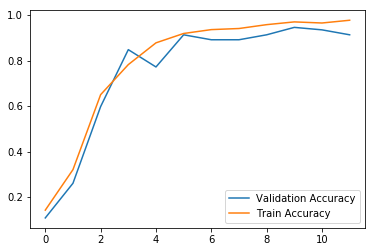

In [19]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 3 Hidden layers

In [20]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [21]:
model3 = Sequential()
model3.add(Dense(400, activation='sigmoid',input_shape = (856,)))
model3.add(Dense(300,activation='sigmoid'))
model3.add(Dense(200,activation='sigmoid'))
model3.add(Dense(num_classes,activation='softmax'))

In [22]:
model3.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               342800    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_8 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 1809      
Total params: 525,109
Trainable params: 525,109
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_fit = model3.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
0s - loss: 2.2678 - acc: 0.1114 - val_loss: 2.2193 - val_acc: 0.1739
Epoch 2/12
0s - loss: 2.1223 - acc: 0.2167 - val_loss: 1.9576 - val_acc: 0.3370
Epoch 3/12
0s - loss: 1.6804 - acc: 0.4395 - val_loss: 1.4525 - val_acc: 0.5435
Epoch 4/12
0s - loss: 1.0658 - acc: 0.6780 - val_loss: 0.8985 - val_acc: 0.7283
Epoch 5/12
0s - loss: 0.7022 - acc: 0.7942 - val_loss: 0.6689 - val_acc: 0.8043
Epoch 6/12
0s - loss: 0.4732 - acc: 0.8523 - val_loss: 0.5563 - val_acc: 0.8261
Epoch 7/12
0s - loss: 0.3435 - acc: 0.9104 - val_loss: 0.4000 - val_acc: 0.8587
Epoch 8/12
0s - loss: 0.2518 - acc: 0.9346 - val_loss: 0.3432 - val_acc: 0.9239
Epoch 9/12
0s - loss: 0.2005 - acc: 0.9395 - val_loss: 0.3245 - val_acc: 0.9239
Epoch 10/12
0s - loss: 0.1564 - acc: 0.9528 - val_loss: 0.4267 - val_acc: 0.8696
Epoch 11/12
0s - loss: 0.1271 - acc: 0.9673 - val_loss: 0.3366 - val_acc: 0.9239
Epoch 12/12
0s - loss: 0.1109 - acc: 0.9685 - val_loss: 0.3659 - val_acc:

In [24]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model3.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,17,0,0,0,0,0,0,0,0
2,0,18,0,0,0,0,0,0,0
3,1,0,17,0,0,0,1,0,0
4,0,0,1,18,0,0,0,0,2
5,0,0,0,0,18,0,0,0,0
6,0,0,0,0,0,15,0,0,0
7,0,0,0,0,0,0,17,0,0
8,0,0,0,0,0,0,0,18,0
9,0,0,0,0,0,3,0,0,16


In [25]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

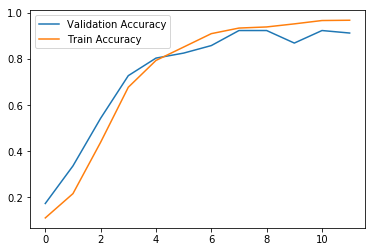

In [26]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 4 Hidden Layers

In [27]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [28]:
model4 = Sequential()
model4.add(Dense(400, activation='sigmoid',input_shape = (856,)))
model4.add(Dense(300,activation='sigmoid'))
model4.add(Dense(200,activation='sigmoid'))
model4.add(Dense(100,activation='sigmoid'))
model4.add(Dense(num_classes,activation='softmax'))

In [29]:
model4.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               342800    
_________________________________________________________________
dense_11 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_12 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 909       
Total params: 544,309
Trainable params: 544,309
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_fit = model4.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
0s - loss: 2.2463 - acc: 0.1090 - val_loss: 2.2265 - val_acc: 0.1087
Epoch 2/12
0s - loss: 2.1948 - acc: 0.1283 - val_loss: 2.1033 - val_acc: 0.1739
Epoch 3/12
0s - loss: 1.8763 - acc: 0.3196 - val_loss: 1.5678 - val_acc: 0.4783
Epoch 4/12
0s - loss: 1.3703 - acc: 0.5206 - val_loss: 1.2008 - val_acc: 0.6739
Epoch 5/12
0s - loss: 1.0117 - acc: 0.6840 - val_loss: 0.9360 - val_acc: 0.6957
Epoch 6/12
0s - loss: 0.7053 - acc: 0.7748 - val_loss: 0.6282 - val_acc: 0.8043
Epoch 7/12
0s - loss: 0.5039 - acc: 0.8523 - val_loss: 0.5329 - val_acc: 0.8043
Epoch 8/12
0s - loss: 0.3847 - acc: 0.8910 - val_loss: 0.6064 - val_acc: 0.8370
Epoch 9/12
0s - loss: 0.2879 - acc: 0.9213 - val_loss: 0.4283 - val_acc: 0.8261
Epoch 10/12
0s - loss: 0.2080 - acc: 0.9492 - val_loss: 0.3959 - val_acc: 0.8913
Epoch 11/12
0s - loss: 0.1661 - acc: 0.9528 - val_loss: 0.2663 - val_acc: 0.9348
Epoch 12/12
0s - loss: 0.1248 - acc: 0.9685 - val_loss: 0.3914 - val_acc:

In [31]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model4.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,17,0,0,0,0,0,0,0,0
2,1,18,0,0,0,0,0,0,0
3,0,0,12,0,0,0,0,0,0
4,0,0,6,18,0,1,1,0,1
5,0,0,0,0,18,0,0,0,0
6,0,0,0,0,0,7,0,0,0
7,0,0,0,0,0,10,17,0,4
8,0,0,0,0,0,0,0,18,5
9,0,0,0,0,0,0,0,0,8


In [32]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

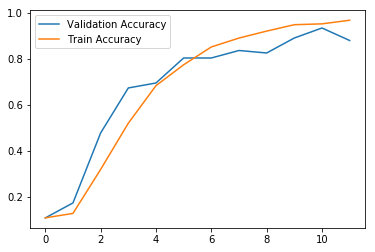

In [33]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 5 hidden layers

In [34]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [35]:
model5 = Sequential()
model5.add(Dense(500, activation='sigmoid',input_shape = (856,)))
model5.add(Dense(400,activation='sigmoid'))
model5.add(Dense(300,activation='sigmoid'))
model5.add(Dense(200,activation='sigmoid'))
model5.add(Dense(100,activation='sigmoid'))
model5.add(Dense(num_classes,activation='softmax'))

In [36]:
model5.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 500)               428500    
_________________________________________________________________
dense_16 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_17 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_18 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_20 (Dense)             (None, 9)                 909       
Total params: 830,409
Trainable params: 830,409
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_fit = model5.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
1s - loss: 2.2510 - acc: 0.0944 - val_loss: 2.2216 - val_acc: 0.1087
Epoch 2/12
0s - loss: 2.2256 - acc: 0.0993 - val_loss: 2.1859 - val_acc: 0.2065
Epoch 3/12
1s - loss: 1.9164 - acc: 0.2276 - val_loss: 1.6443 - val_acc: 0.3913
Epoch 4/12
1s - loss: 1.5481 - acc: 0.3717 - val_loss: 1.5156 - val_acc: 0.3913
Epoch 5/12
1s - loss: 1.2728 - acc: 0.4758 - val_loss: 1.2450 - val_acc: 0.4130
Epoch 6/12
1s - loss: 1.0499 - acc: 0.5484 - val_loss: 1.0040 - val_acc: 0.5543
Epoch 7/12
1s - loss: 0.8718 - acc: 0.6755 - val_loss: 0.9512 - val_acc: 0.6848
Epoch 8/12
1s - loss: 0.6238 - acc: 0.8087 - val_loss: 0.6484 - val_acc: 0.8261
Epoch 9/12
1s - loss: 0.4635 - acc: 0.8644 - val_loss: 0.6144 - val_acc: 0.8261
Epoch 10/12
1s - loss: 0.3342 - acc: 0.9007 - val_loss: 0.9213 - val_acc: 0.7174
Epoch 11/12
1s - loss: 0.2701 - acc: 0.9177 - val_loss: 0.3979 - val_acc: 0.9022
Epoch 12/12
0s - loss: 0.2145 - acc: 0.9443 - val_loss: 0.4267 - val_acc:

In [38]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model5.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,17,0,0,0,0,0,0,0,0
2,1,18,0,0,0,0,0,0,0
3,0,0,18,0,0,0,0,0,0
4,0,0,0,18,0,0,0,0,1
5,0,0,0,0,18,0,0,0,0
6,0,0,0,0,0,17,3,0,3
7,0,0,0,0,0,1,15,0,0
8,0,0,0,0,0,0,0,18,0
9,0,0,0,0,0,0,0,0,14


In [39]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

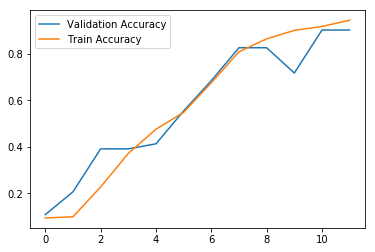

In [40]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 6 hidden layer

In [41]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [42]:
model6 = Sequential()
model6.add(Dense(600, activation='sigmoid',input_shape = (856,)))
model6.add(Dense(500,activation='sigmoid'))
model6.add(Dense(400,activation='sigmoid'))
model6.add(Dense(300,activation='sigmoid'))
model6.add(Dense(200,activation='sigmoid'))
model6.add(Dense(100,activation='sigmoid'))
model6.add(Dense(num_classes,activation='softmax'))

In [43]:
model6.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 600)               514200    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_23 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_24 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_25 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_27 (Dense)             (None, 9)                 909       
Total para

In [44]:
model_fit = model6.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
1s - loss: 2.2517 - acc: 0.1162 - val_loss: 2.2197 - val_acc: 0.1196
Epoch 2/12
1s - loss: 2.2298 - acc: 0.1271 - val_loss: 2.2268 - val_acc: 0.1087
Epoch 3/12
1s - loss: 2.1729 - acc: 0.1368 - val_loss: 1.9514 - val_acc: 0.2609
Epoch 4/12
1s - loss: 1.7706 - acc: 0.2518 - val_loss: 1.7452 - val_acc: 0.2500
Epoch 5/12
1s - loss: 1.5766 - acc: 0.3172 - val_loss: 1.5063 - val_acc: 0.4022
Epoch 6/12
1s - loss: 1.4219 - acc: 0.4056 - val_loss: 1.8288 - val_acc: 0.2717
Epoch 7/12
1s - loss: 1.2787 - acc: 0.4976 - val_loss: 1.6761 - val_acc: 0.3261
Epoch 8/12
1s - loss: 1.0807 - acc: 0.6247 - val_loss: 1.1788 - val_acc: 0.5978
Epoch 9/12
1s - loss: 0.8526 - acc: 0.7058 - val_loss: 0.8460 - val_acc: 0.7174
Epoch 10/12
1s - loss: 0.7339 - acc: 0.7482 - val_loss: 1.0169 - val_acc: 0.6522
Epoch 11/12
1s - loss: 0.6269 - acc: 0.7845 - val_loss: 0.8921 - val_acc: 0.6957
Epoch 12/12
1s - loss: 0.5027 - acc: 0.8317 - val_loss: 0.6476 - val_acc:

In [45]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model6.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,17,0,0,4,0,0,0,0,0
2,0,16,0,0,0,0,0,9,1
3,0,0,15,0,0,0,0,0,0
4,1,1,3,14,0,0,1,0,1
5,0,0,0,0,18,0,0,0,0
6,0,1,0,0,0,15,2,0,3
7,0,0,0,0,0,3,15,0,0
8,0,0,0,0,0,0,0,9,0
9,0,0,0,0,0,0,0,0,13


In [46]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

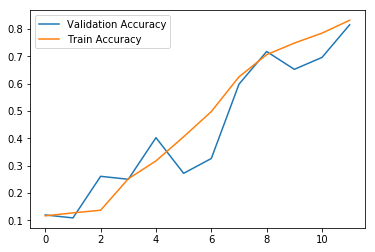

In [47]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 7 Hidden layer

In [48]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [49]:
model7 = Sequential()
model7.add(Dense(700, activation='sigmoid',input_shape = (856,)))
model7.add(Dense(600,activation='sigmoid'))
model7.add(Dense(500,activation='sigmoid'))
model7.add(Dense(400,activation='sigmoid'))
model7.add(Dense(300,activation='sigmoid'))
model7.add(Dense(200,activation='sigmoid'))
model7.add(Dense(100,activation='sigmoid'))
model7.add(Dense(num_classes,activation='softmax'))

In [50]:
model7.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 700)               599900    
_________________________________________________________________
dense_29 (Dense)             (None, 600)               420600    
_________________________________________________________________
dense_30 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_31 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_32 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_33 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_34 (Dense)             (None, 100)               20100     
__________

In [51]:
model_fit = model7.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
2s - loss: 2.2523 - acc: 0.1041 - val_loss: 2.2168 - val_acc: 0.1087
Epoch 2/12
2s - loss: 2.2368 - acc: 0.1005 - val_loss: 2.2218 - val_acc: 0.1196
Epoch 3/12
2s - loss: 2.2281 - acc: 0.1271 - val_loss: 2.2123 - val_acc: 0.1087
Epoch 4/12
2s - loss: 2.1933 - acc: 0.1392 - val_loss: 2.2859 - val_acc: 0.1087
Epoch 5/12
2s - loss: 1.8662 - acc: 0.2264 - val_loss: 1.7568 - val_acc: 0.2826
Epoch 6/12
2s - loss: 1.6886 - acc: 0.2627 - val_loss: 2.0342 - val_acc: 0.1196
Epoch 7/12
2s - loss: 1.5834 - acc: 0.3136 - val_loss: 1.4892 - val_acc: 0.3913
Epoch 8/12
2s - loss: 1.4523 - acc: 0.3571 - val_loss: 1.4491 - val_acc: 0.3370
Epoch 9/12
2s - loss: 1.3349 - acc: 0.3995 - val_loss: 1.3181 - val_acc: 0.4457
Epoch 10/12
2s - loss: 1.2535 - acc: 0.4370 - val_loss: 1.7969 - val_acc: 0.2500
Epoch 11/12
2s - loss: 1.1956 - acc: 0.4673 - val_loss: 1.2582 - val_acc: 0.5000
Epoch 12/12
2s - loss: 1.1290 - acc: 0.4770 - val_loss: 1.5148 - val_acc:

In [52]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model7.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,17,0,0,0,0,0,15,7,0
2,1,13,0,2,0,15,2,4,4
3,0,0,7,2,5,0,0,0,0
4,0,0,5,4,0,0,0,0,0
5,0,0,0,0,13,0,0,0,0
6,0,3,0,3,0,3,1,1,14
8,0,2,0,0,0,0,0,6,0
9,0,0,6,7,0,0,0,0,0


In [53]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

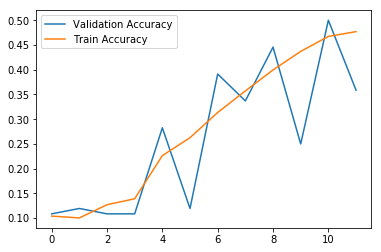

In [54]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 8 Hidden layers

In [55]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [56]:
model8 = Sequential()
model8.add(Dense(800, activation='sigmoid',input_shape = (856,)))
model8.add(Dense(700,activation='sigmoid'))
model8.add(Dense(600,activation='sigmoid'))
model8.add(Dense(500,activation='sigmoid'))
model8.add(Dense(400,activation='sigmoid'))
model8.add(Dense(300,activation='sigmoid'))
model8.add(Dense(200,activation='sigmoid'))
model8.add(Dense(100,activation='sigmoid'))
model8.add(Dense(num_classes,activation='softmax'))

In [57]:
model8.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 800)               685600    
_________________________________________________________________
dense_37 (Dense)             (None, 700)               560700    
_________________________________________________________________
dense_38 (Dense)             (None, 600)               420600    
_________________________________________________________________
dense_39 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_40 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_41 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_42 (Dense)             (None, 200)               60200     
__________

In [58]:
model_fit = model8.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
3s - loss: 2.2525 - acc: 0.1041 - val_loss: 2.2294 - val_acc: 0.1196
Epoch 2/12
3s - loss: 2.2318 - acc: 0.1077 - val_loss: 2.2159 - val_acc: 0.1087
Epoch 3/12
3s - loss: 2.2311 - acc: 0.0932 - val_loss: 2.2032 - val_acc: 0.1196
Epoch 4/12
2s - loss: 2.2255 - acc: 0.1174 - val_loss: 2.2068 - val_acc: 0.1087
Epoch 5/12
2s - loss: 2.2252 - acc: 0.1041 - val_loss: 2.2098 - val_acc: 0.1087
Epoch 6/12
2s - loss: 2.2195 - acc: 0.1017 - val_loss: 2.2250 - val_acc: 0.1087
Epoch 7/12
2s - loss: 2.2213 - acc: 0.0956 - val_loss: 2.2040 - val_acc: 0.1087
Epoch 8/12
2s - loss: 2.2147 - acc: 0.1102 - val_loss: 2.2262 - val_acc: 0.1087
Epoch 9/12
2s - loss: 2.2196 - acc: 0.1138 - val_loss: 2.2030 - val_acc: 0.1087
Epoch 10/12
2s - loss: 2.2157 - acc: 0.0920 - val_loss: 2.2167 - val_acc: 0.1087
Epoch 11/12
2s - loss: 2.2181 - acc: 0.0993 - val_loss: 2.2093 - val_acc: 0.1087
Epoch 12/12
3s - loss: 2.2203 - acc: 0.1029 - val_loss: 2.2040 - val_acc:

In [59]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model8.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

162/162 [==============================] - 0s     


col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
5,18,18,18,18,18,18,18,18,18


In [60]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

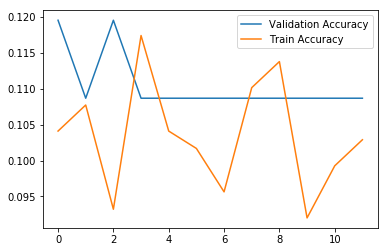

In [61]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 9 Hidden layers

In [62]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [63]:
model9 = Sequential()
model9.add(Dense(900, activation='sigmoid',input_shape = (856,)))
model9.add(Dense(800,activation='sigmoid'))
model9.add(Dense(700,activation='sigmoid'))
model9.add(Dense(600,activation='sigmoid'))
model9.add(Dense(500,activation='sigmoid'))
model9.add(Dense(400,activation='sigmoid'))
model9.add(Dense(300,activation='sigmoid'))
model9.add(Dense(200,activation='sigmoid'))
model9.add(Dense(100,activation='sigmoid'))
model9.add(Dense(num_classes,activation='softmax'))

In [64]:
model9.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 900)               771300    
_________________________________________________________________
dense_46 (Dense)             (None, 800)               720800    
_________________________________________________________________
dense_47 (Dense)             (None, 700)               560700    
_________________________________________________________________
dense_48 (Dense)             (None, 600)               420600    
_________________________________________________________________
dense_49 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_50 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_51 (Dense)             (None, 300)               120300    
__________

In [65]:
model_fit = model9.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
4s - loss: 2.2491 - acc: 0.1029 - val_loss: 2.2193 - val_acc: 0.1087
Epoch 2/12
4s - loss: 2.2354 - acc: 0.1065 - val_loss: 2.2377 - val_acc: 0.1087
Epoch 3/12
3s - loss: 2.2255 - acc: 0.1150 - val_loss: 2.2455 - val_acc: 0.1087
Epoch 4/12
3s - loss: 2.2289 - acc: 0.0981 - val_loss: 2.2119 - val_acc: 0.1087
Epoch 5/12
3s - loss: 2.2213 - acc: 0.1077 - val_loss: 2.2241 - val_acc: 0.1087
Epoch 6/12
4s - loss: 2.2185 - acc: 0.1065 - val_loss: 2.2296 - val_acc: 0.1087
Epoch 7/12
4s - loss: 2.2130 - acc: 0.1114 - val_loss: 2.2101 - val_acc: 0.1087
Epoch 8/12
4s - loss: 2.2183 - acc: 0.0920 - val_loss: 2.1993 - val_acc: 0.1087
Epoch 9/12
4s - loss: 2.2144 - acc: 0.0993 - val_loss: 2.2045 - val_acc: 0.1196
Epoch 10/12
3s - loss: 2.2150 - acc: 0.1017 - val_loss: 2.2084 - val_acc: 0.1087
Epoch 11/12
3s - loss: 2.2172 - acc: 0.1053 - val_loss: 2.2019 - val_acc: 0.1196
Epoch 12/12
4s - loss: 2.2152 - acc: 0.0993 - val_loss: 2.2051 - val_acc:

In [66]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model9.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

160/162 [============================>.] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
8,18,18,18,18,18,18,18,18,18


In [67]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

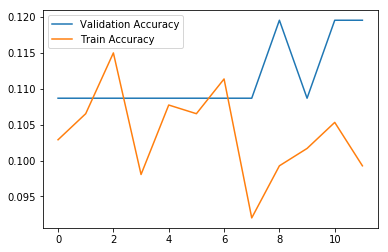

In [68]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Model with 10 Hidden layer

In [69]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [70]:
model10 = Sequential()
model10.add(Dense(1000, activation='sigmoid',input_shape = (856,)))
model10.add(Dense(900,activation='sigmoid'))
model10.add(Dense(800,activation='sigmoid'))
model10.add(Dense(700,activation='sigmoid'))
model10.add(Dense(600,activation='sigmoid'))
model10.add(Dense(500,activation='sigmoid'))
model10.add(Dense(400,activation='sigmoid'))
model10.add(Dense(300,activation='sigmoid'))
model10.add(Dense(200,activation='sigmoid'))
model10.add(Dense(100,activation='sigmoid'))
model10.add(Dense(num_classes,activation='softmax'))

In [71]:
model10.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])
model10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1000)              857000    
_________________________________________________________________
dense_56 (Dense)             (None, 900)               900900    
_________________________________________________________________
dense_57 (Dense)             (None, 800)               720800    
_________________________________________________________________
dense_58 (Dense)             (None, 700)               560700    
_________________________________________________________________
dense_59 (Dense)             (None, 600)               420600    
_________________________________________________________________
dense_60 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_61 (Dense)             (None, 400)               200400    
__________

In [72]:
model_fit = model10.fit(x_train,y_train,verbose=2,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Train on 826 samples, validate on 92 samples
Epoch 1/12
5s - loss: 2.2495 - acc: 0.1017 - val_loss: 2.2458 - val_acc: 0.1087
Epoch 2/12
5s - loss: 2.2290 - acc: 0.1077 - val_loss: 2.2079 - val_acc: 0.1087
Epoch 3/12
5s - loss: 2.2301 - acc: 0.1017 - val_loss: 2.2175 - val_acc: 0.1196
Epoch 4/12
5s - loss: 2.2149 - acc: 0.1162 - val_loss: 2.2149 - val_acc: 0.1196
Epoch 5/12
5s - loss: 2.2181 - acc: 0.1186 - val_loss: 2.2105 - val_acc: 0.1087
Epoch 6/12
5s - loss: 2.2175 - acc: 0.1005 - val_loss: 2.2090 - val_acc: 0.1087
Epoch 7/12
5s - loss: 2.2186 - acc: 0.0896 - val_loss: 2.2061 - val_acc: 0.1087
Epoch 8/12
5s - loss: 2.2168 - acc: 0.0932 - val_loss: 2.2046 - val_acc: 0.1196
Epoch 9/12
5s - loss: 2.2123 - acc: 0.1174 - val_loss: 2.2046 - val_acc: 0.1087
Epoch 10/12
5s - loss: 2.2159 - acc: 0.0956 - val_loss: 2.2061 - val_acc: 0.1087
Epoch 11/12
4s - loss: 2.2144 - acc: 0.0896 - val_loss: 2.2131 - val_acc: 0.1087
Epoch 12/12
5s - loss: 2.2169 - acc: 0.1029 - val_loss: 2.2019 - val_acc:

In [73]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model10.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

128/162 [======================>.......] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
5,18,18,18,18,18,18,18,18,18


In [74]:
test_fail = [im for im in zip(predicted_classes,y_test) if im[0] != im[1]]
accuracy = ((162- len(test_fail))*100/162)
test_accuracy.append(accuracy)
train_accuracy.append(model_fit.history['acc'][epochs-1])

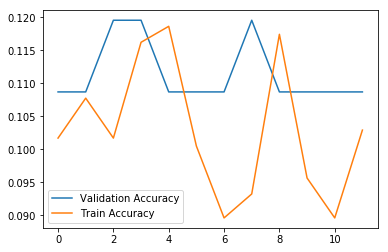

In [75]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

In [76]:
test_accuracy

[96.91358024691358,
 96.91358024691358,
 95.06172839506173,
 82.09876543209876,
 94.44444444444444,
 81.48148148148148,
 38.888888888888886,
 11.11111111111111,
 11.11111111111111,
 11.11111111111111]

In [77]:
train_accuracy = [t*100 for t in train_accuracy]
train_accuracy

[99.878934653561572,
 97.699758244484443,
 96.852300848279683,
 96.852300588501578,
 94.430992764941706,
 83.171913294757545,
 47.699757768224572,
 10.29055716230852,
 9.9273610165563682,
 10.290557119012167]

In [78]:
model_plot = pd.concat([pd.DataFrame([1,2,3,4,5,6,7,8,9,10]), pd.DataFrame(train_accuracy),pd.DataFrame(test_accuracy)],axis=1)

In [79]:
model_plot.columns = ['Model','Training Accuracy','Test Accuracy']

In [80]:
model_plot = model_plot.set_index(['Model'])

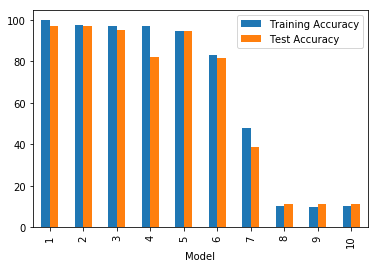

In [81]:
model_plot.plot(kind='bar')
plt.show()

# Applying EarlyStopping and Drop Out on Model 2(best model)

In [82]:
output_data = np.array(data[0].apply(lambda class_of_doc : class_of_doc -1))
input_data = np.array(data.drop(0, axis=1))
output_data = to_categorical(output_data, num_classes)
x_train = input_data[:int(0.85*row)]
x_test = input_data[int(0.85*row):]
y_train = output_data[:int(0.85*row)]
y_test = output_data[int(0.85*row):]

In [83]:
model = Sequential()
model.add(Dropout(0.2,input_shape = (856,)))
model.add(Dense(400, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
earlystop = [keras.callbacks.EarlyStopping(monitor='val_acc',min_delta = 0.01,mode = 'max', patience=10)]
model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [84]:
model_fit = model.fit(x_train,y_train,verbose=2,batch_size=batch_size,
                       epochs = 100,
                       validation_split = 0.2,
                       callbacks = earlystop)

Train on 734 samples, validate on 184 samples
Epoch 1/100
0s - loss: 2.2627 - acc: 0.1335 - val_loss: 2.3232 - val_acc: 0.1141
Epoch 2/100
0s - loss: 2.1102 - acc: 0.2207 - val_loss: 2.0265 - val_acc: 0.2880
Epoch 3/100
0s - loss: 1.9134 - acc: 0.3488 - val_loss: 1.8309 - val_acc: 0.3315
Epoch 4/100
0s - loss: 1.5671 - acc: 0.5082 - val_loss: 1.4779 - val_acc: 0.5217
Epoch 5/100
0s - loss: 1.2523 - acc: 0.6431 - val_loss: 1.1822 - val_acc: 0.6522
Epoch 6/100
0s - loss: 0.9887 - acc: 0.7357 - val_loss: 1.0246 - val_acc: 0.5978
Epoch 7/100
0s - loss: 0.7929 - acc: 0.7847 - val_loss: 0.7904 - val_acc: 0.7283
Epoch 8/100
0s - loss: 0.6932 - acc: 0.7970 - val_loss: 0.5648 - val_acc: 0.8804
Epoch 9/100
0s - loss: 0.5980 - acc: 0.8311 - val_loss: 0.5039 - val_acc: 0.8261
Epoch 10/100
0s - loss: 0.4837 - acc: 0.8542 - val_loss: 0.6615 - val_acc: 0.7446
Epoch 11/100
0s - loss: 0.4107 - acc: 0.8815 - val_loss: 0.3995 - val_acc: 0.9130
Epoch 12/100
0s - loss: 0.3585 - acc: 0.8842 - val_loss: 0.35

In [85]:
output_data = np.array(data[0])
y_test = output_data[int(0.85*row):]
predicted_classes = model.predict_classes(x_test)
predicted_classes = predicted_classes + 1
pd.crosstab(predicted_classes,y_test)

 32/162 [====>.........................] - ETA: 0s

col_0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,
1,18,0,0,0,0,0,0,0,0
2,0,18,0,0,0,0,1,0,0
3,0,0,18,0,0,0,0,0,0
4,0,0,0,18,0,0,0,0,1
5,0,0,0,0,18,0,0,0,0
6,0,0,0,0,0,18,0,0,1
7,0,0,0,0,0,0,17,0,0
8,0,0,0,0,0,0,0,18,0
9,0,0,0,0,0,0,0,0,16


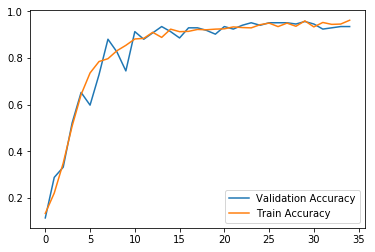

In [86]:
plt.plot(model_fit.epoch, model_fit.history['val_acc'])
plt.plot(model_fit.epoch, model_fit.history['acc'])
plt.legend(['Validation Accuracy','Train Accuracy'])
plt.show()

# Predicting the output upon the above model weights and bias

In [87]:
import math
def sigmoid(x):
    return (1/(1+math.exp(-x)))
def softmax(w, t = 1.0):
    npa = np.array
    e = np.exp(npa(w) / t)
    dist = e / np.sum(e)
    return dist

In [88]:
weights = model.get_weights()
w0 = weights[0]
b0 = weights[1]
w1 = weights[2]
b1 = weights[3]
w2 = weights[4]
b2 = weights[5]

In [89]:
input1 = x_test[15]
input1 = input1.reshape((1,856))
input2 = input1.dot(w0) + b0
i2= []
input2 = input2.reshape((400))
for k in input2:
    i2.append(sigmoid(k))
input2 = np.array(i2)

input2 = input2.reshape((1,400))
input3 = input2.dot(w1) + b1
i3 = []
input3 = input3.reshape((200))
for k in input3:
    i3.append(sigmoid(k))
input3 = np.array(i3)

input3 = input3.reshape((1,200))
output = input3.dot(w2) + b2
output = output.reshape((9))
output = softmax(output)
output = output.reshape((1,9))
print(np.argmax(output))
int(model.predict_classes(input1))

8
1/1 [==============================] - 0s


8

# Method to predict using the model

In [95]:
def check_model(model, x_test, element):
    input_to_layer = x_test[element]
    shape, = input_to_layer.shape
    input_to_layer = input_to_layer.reshape((1,shape))
    actual_class  = int(model.predict_classes(input_to_layer))
    weights = model.get_weights()
    number_of_layer = 0
    last_layer = 3
    for i in range(0,len(weights),2):
        number_of_layer += 1
        weight = weights[i]
        bias = weights[i+1]
        row, = bias.shape
        input_to_layer = input_to_layer.dot(weight) + bias
        input_to_layer = input_to_layer.reshape((row))
        inp = []
        if number_of_layer != last_layer:
            for i in input_to_layer:
                inp.append(sigmoid(i))
            input_to_layer = np.array(inp)
            input_to_layer = input_to_layer.reshape((1,row))
        elif number_of_layer == last_layer:
            input_to_layer = softmax(input_to_layer)
            input_to_layer = input_to_layer.reshape((1,row))
            predicted_class = np.argmax(input_to_layer)
            if actual_class == predicted_class:
                message = 'Success'
            else:
                message == 'Fail'
    return message, actual_class, predicted_class

In [96]:
check_model(model,x_test,15)

1/1 [==============================] - 0s


('Success', 6, 6)